<a href="https://colab.research.google.com/github/Tejaswini-Gsl/neural-networks/blob/main/Copy_of_Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import os
import librosa as lr
import shutil
import dask.array as da
import h5py
import glob
# import resampy
import imageio
from PIL import Image



# from keras.models import Model, load_model
# from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
# from keras.layers import Dropout, Input, BatchNormalization
# from keras.optimizers import Nadam
# from keras.preprocessing.image import ImageDataGenerator
# from keras.utils import np_utils

In [2]:
# importing english dataset

other_df_en = pd.read_csv('/content/drive/MyDrive/neural dataset/en/other.tsv', sep='\t')
validate_sen_df_en = pd.read_csv('/content/drive/MyDrive/neural dataset/en/validated.tsv', sep='\t')
unvalidate_sen_df_en = pd.read_csv('/content/drive/MyDrive/neural dataset/en/invalidated.tsv', sep='\t')
other_df_de = pd.read_csv('/content/drive/MyDrive/neural dataset/de/other.tsv', sep='\t')
validate_sen_df_de = pd.read_csv('/content/drive/MyDrive/neural dataset/de/validated.tsv', sep='\t')
unvalidate_sen_df_de = pd.read_csv('/content/drive/MyDrive/neural dataset/de/invalidated.tsv', sep='\t')
other_df_ca = pd.read_csv('/content/drive/MyDrive/neural dataset/ca/other.tsv', sep='\t')
validate_sen_df_ca = pd.read_csv('/content/drive/MyDrive/neural dataset/ca/validated.tsv', sep='\t')
unvalidate_sen_df_ca = pd.read_csv('/content/drive/MyDrive/neural dataset/ca/invalidated.tsv', sep='\t')

print(validate_sen_df_en.shape,validate_sen_df_ca.shape,validate_sen_df_de.shape)
print("values of en:",other_df_en['sentence_domain'].notnull().sum(),validate_sen_df_en['sentence_domain'].notnull().sum(),unvalidate_sen_df_en['sentence_domain'].notnull().sum())
print("values of de:",other_df_de['sentence_domain'].notnull().sum(),validate_sen_df_de['sentence_domain'].notnull().sum(),unvalidate_sen_df_de['sentence_domain'].notnull().sum())
print("values of ca:",other_df_ca['sentence_domain'].notnull().sum(),validate_sen_df_ca['sentence_domain'].notnull().sum(),unvalidate_sen_df_ca['sentence_domain'].notnull().sum())

(1877, 13) (1586, 13) (12901, 13)
values of en: 102 1 1
values of de: 5 32 3
values of ca: 219 2 0


In [5]:
# def cleaned_data(other_df,validate_sen_df,unvalidate_sen_df,lan):
#   other_df_cleaned = other_df.dropna(subset=['sentence_domain'], inplace=False)
#   validate_sen_df_cleaned = validate_sen_df.dropna(subset=['sentence_domain'], inplace=False)
#   unvalidate_sen_df_cleaned = unvalidate_sen_df.dropna(subset=['sentence_domain'], inplace=False)
#   print(other_df_cleaned.shape,validate_sen_df_cleaned.shape,unvalidate_sen_df_cleaned.shape)
#   result = pd.concat([other_df_cleaned,validate_sen_df_cleaned,unvalidate_sen_df_cleaned], axis=0)
#   print(result.shape)
#   file_path = "/content/drive/MyDrive/neural dataset/{}/other_cleaned.tsv".format(lan)
#   result.to_csv(file_path, sep='\t', index=False)
#   return(result)

# df_en = cleaned_data(other_df_en,validate_sen_df_en,unvalidate_sen_df_en,'en')
# df_de = cleaned_data(other_df_de,validate_sen_df_de,unvalidate_sen_df_de,'de')
# df_ca = pd.read_csv('/content/drive/MyDrive/neural dataset/ca/other_cleaned.tsv', sep='\t')[:102]

In [6]:
# import os
# import shutil

# def allclips(df,lan):
#   # Source folder containing the MP3 files

#   path = '/content/drive/MyDrive/neural dataset/{}/clips'.format(lan)
#   source_folder = path

#   # Destination folder where MP3 files will be moved
#   destination_folder = '/content/drive/MyDrive/neural dataset/allclips'

#   # Create destination folder if it doesn't exist
#   os.makedirs(destination_folder, exist_ok=True)

#   # Loop through each row in the DataFrame
#   for index, row in df.iterrows():
#       # Extract the MP3 file name from the 'path' column
#       mp3_file = os.path.basename(row['path'])

#       # Construct the full path of the MP3 file in the source folder
#       source_path = os.path.join(source_folder, mp3_file)

#       # Construct the full path of the MP3 file in the destination folder
#       destination_path = os.path.join(destination_folder, mp3_file)

#       # Check if the MP3 file exists in the source folder
#       if os.path.exists(source_path):
#           # Move the MP3 file from the source folder to the destination folder
#           shutil.move(source_path, destination_path)
#           print(f"Moved {mp3_file} to {destination_folder}")
#       else:
#           print(f"MP3 file {mp3_file} not found in the source folder")

#   print("All MP3 files have been moved.")


# allclips(df_en,'en')
# # allclips(df_de,'de')


In [7]:
# print("other:",other_df_en_cleaned.columns)
# print("validate:",validate_sen_df_en_cleaned.columns)
# print("unvalidate:",unvalidate_sen_df_en_cleaned.columns)
# df_ca.shape

In [8]:

# time_steps = 16000  # Assuming 1 second audio clips with a sampling rate of 16 kHz
# num_mfcc_features = 13  # Example value for the number of MFCC features


In [7]:


def load_audio(file_path, sr=16000):
    data,sr = lr.load(file_path)
    return data

validate_sen_df_en['audio'] = validate_sen_df_en['path'].apply(lambda x: load_audio(f'/content/drive/MyDrive/neural dataset/en/clips/{x}'))
validate_sen_df_ca['audio'] = validate_sen_df_ca['path'].apply(lambda x: load_audio(f'/content/drive/MyDrive/neural dataset/ca/val_clips/{x}'))
# df_total['audio'] = df_total['path'].apply(lambda x: load_audio(f'/content/drive/MyDrive/neural dataset/allclips/{x}'))

# dev_df['audio'] = dev_df['path'].apply(lambda x: load_audio(f'/content/drive/MyDrive/neural dataset/te/clips/{x}'))
# test_df['audio'] = test_df['path'].apply(lambda x: load_audio(f'/content/drive/MyDrive/neural dataset/te/clips/{x}'))

In [8]:
validate_sen_df_ca.head(1)

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment,audio
0,0bf9a3c9eebf8e427fa1d08800532c4bb279c13c113446...,common_voice_ca_39702834.mp3,d159405abc07362ede5b393be7a63233f72fdc766a3186...,La finalització de la guerra obrí un tens perí...,NaN,2,0,fourties,female_feminine,NaN,NaN,ca,NaN,"[-3.9815347e-12, -8.749569e-13, -4.1578212e-12..."


In [11]:
# # df_total = pd.concat([validate_sen_df_en,validate_sen_df_ca], axis=0)
# # df_total.shape
# validate_sen_df_en.to_csv('/content/drive/MyDrive/neural dataset/data_en.csv', index=False)
# validate_sen_df_ca.to_csv('/content/drive/MyDrive/neural dataset/data_ca.csv', index=False)

In [4]:
# validate_sen_df_en = pd.read_csv('/content/drive/MyDrive/neural dataset/data_en.csv')
# validate_sen_df_ca = pd.read_csv('/content/drive/MyDrive/neural dataset/data_ca.csv')


In [9]:
df_total = pd.concat([validate_sen_df_en,validate_sen_df_ca], axis=0)
df_total.head(1)

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment,audio
0,01e8ea298cdecf26e273f5baac3915eb992c493f229686...,common_voice_en_39751075.mp3,e5e7d4694b7160add018a08876327f254690c1ab4c39ea...,Madin was a significant figure of post-war Bir...,NaN,2,0,NaN,NaN,"United States English,New York English",NaN,en,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [12]:
# Assuming the two DataFrames are named other_df_en and another_df
# And they both have a 'sentence_id' column

# Merge the two DataFrames based on 'sentence_id'
# merged_df = pd.merge(validate_sen_df_en,other_df_en, on='sentence_id', suffixes=('_en', '_another'))

# # Now you can compare the columns or perform further analysis on the merged data
# # print(merged_df.head())
# merged_df.head()

In [13]:
# Assuming the other DataFrame is named 'another_df' and it has 'sentence_id' and 'domain' columns
# Mapping sentence_id to domain values in a dictionary
# id_to_domain = dict(zip(validate_sen_df_en['sentence_id'], validate_sen_df_en['sentence_domain']))

# first2pairs = {k: id_to_domain[k] for k in list(id_to_domain)[:2]}
# print(first2pairs)
# # Fill null values in 'sentence_domain' column with values from 'another_df'
# other_df_en['sentence_domain'] = other_df_en['sentence_domain'].fillna(other_df_en['sentence_id'].map(id_to_domain))

In [10]:
# import librosa as lr

# def extract_features(audio, n_mfcc=13, hop_length=512, n_fft=2048):
#     mfcc = lr.feature.mfcc(y=audio, sr=16000, n_mfcc=n_mfcc,
#                            hop_length=hop_length, n_fft=n_fft)
#     return mfcc.T  # Transpose to align time to rows

# df_total['features'] = df_total['audio'].apply(extract_features)
# # dev_df['features'] = dev_df['audio'].apply(extract_features)
# # test_df['features'] = test_df['audio'].apply(extract_features)

# # Print the shapes of the extracted features
# print(df_total['features'][0].shape)  # Assuming you want to check the shape of the first sample
import librosa as lr

def extract_features(audio, n_mels=128, hop_length=512, n_fft=2048):
    mel_spectrogram = lr.feature.melspectrogram(y=audio, sr=16000, n_mels=n_mels,
                                                hop_length=hop_length, n_fft=n_fft)
    return mel_spectrogram.T  # Transpose to align time to rows

# Assuming df_total['audio'] contains the audio data
df_total['features'] = df_total['audio'].apply(extract_features)

# Print the shapes of the extracted features
print(df_total['features'][0].shape)  # Assuming you want to check the shape of the first sample



(2,)


In [11]:
features_lengths = []
for features in df_total['features']:
    features_lengths.append(features.shape[0])


Mean mel-spectrogram length: 220.74
Median mel-spectrogram length: 214.0
90th percentile mel-spectrogram length: 311.8000000000002
95th percentile mel-spectrogram length: 338.0


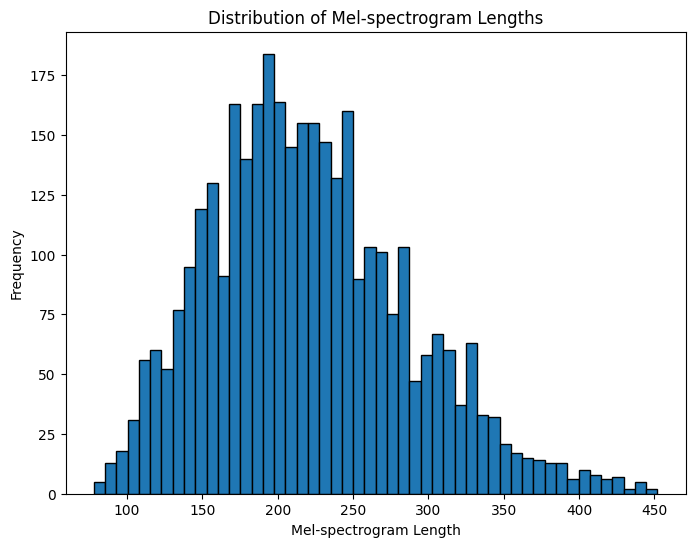

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate statistics
mean_length = np.mean(features_lengths)
median_length = np.median(features_lengths)
percentile_90 = np.percentile(features_lengths, 90)
percentile_95 = np.percentile(features_lengths, 95)

print(f"Mean mel-spectrogram length: {mean_length:.2f}")
print(f"Median mel-spectrogram length: {median_length}")
print(f"90th percentile mel-spectrogram length: {percentile_90}")
print(f"95th percentile mel-spectrogram length: {percentile_95}")

# Plot a histogram
plt.figure(figsize=(8, 6))
plt.hist(features_lengths, bins=50, edgecolor='black')
plt.xlabel('Mel-spectrogram Length')
plt.ylabel('Frequency')
plt.title('Distribution of Mel-spectrogram Lengths')
plt.show()

In [13]:
import numpy as np

# Assuming you have a maximum length for the features
max_length = 256  # Replace with the desired maximum length

# Define a padding function
def pad_features(features, max_length):
    padded_features = np.zeros((max_length, features.shape[1]))
    if features.shape[0] > max_length:
        padded_features = features[:max_length, :]
    else:
        padded_features[:features.shape[0], :] = features
    return padded_features

# Pad the features in the dataframes
df_total['features'] = df_total['features'].apply(lambda x: pad_features(x, max_length))
# dev_df['features'] = dev_df['features'].apply(lambda x: pad_features(x, max_length))
# test_df['features'] = test_df['features'].apply(lambda x: pad_features(x, max_length))

# Now you can convert the features to NumPy arrays
X = np.array(df_total['features'].tolist())
y_domain =(df_total['sentence_domain'])
y_lan = (df_total['locale'])

# X_dev = np.array(dev_df['features'].tolist())
# y_dev = np.array(dev_df['sentence'])

# X_test = np.array(test_df['features'].tolist())
# y_test = np.array(test_df['sentence'])

In [14]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Assuming df_total['locale'] and df_total['sentence_domain'] are the columns with string labels
# Initialize label encoders
label_encoder_lang = LabelEncoder()
label_encoder_domain = LabelEncoder()

# Fit label encoder and return encoded labels
y_lan = label_encoder_lang.fit_transform(df_total['locale'].dropna())
# y_domain = label_encoder_domain.fit_transform(df_total['sentence_domain'].dropna())
# print(y_domain.shape)
# Get the number of classes from the fitted label encoder
num_language_classes = len(label_encoder_lang.classes_)
# num_domain_classes = len(label_encoder_domain.classes_)

# Convert labels to one-hot encoding
y_lan_encoded = to_categorical(y_lan, num_classes=num_language_classes)
# y_domain_encoded= 1

# y_domain_encoded = to_categorical(y_domain, num_classes=num_domain_classes)
y_lan_encoded.shape

(3463, 2)

In [15]:
X.shape,y_lan_encoded.shape

((3463, 256, 128), (3463, 2))

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_lan_train, y_lan_test = train_test_split(
    X, y_lan_encoded, test_size=0.3, random_state=42
)

# Optionally, split the training set further to create a validation set (e.g., 80% of the remaining train for training, 20% for validation)
X_train, X_val, y_lan_train, y_lan_val = train_test_split(
    X_train, y_lan_train, test_size=0.2, random_state=42
)
# X_train, X_test, y_domain_train, y_domain_test, y_lan_train, y_lan_test = train_test_split(
#     X, y_domain_encoded, y_lan_encoded, test_size=0.3, random_state=42
# )

# # Optionally, split the training set further to create a validation set (e.g., 80% of the remaining train for training, 20% for validation)
# X_train, X_val, y_domain_train, y_domain_val, y_lan_train, y_lan_val = train_test_split(
#     X_train, y_domain_train, y_lan_train, test_size=0.2, random_state=42
# )

# Check the shape of each set to ensure everything is correct
# print("Training set:", X_train.shape, y_domain_train.shape, y_lan_train.shape)
# print("Validation set:", X_val.shape, y_domain_val.shape, y_lan_val.shape)
# print("Test set:", X_test.shape, y_domain_test.shape, y_lan_test.shape)

In [17]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)/ 255.0
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)/ 255.0
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)/255.0

In [18]:
num_domain_classes= 5
X_train.shape


(1939, 256, 128, 1)

In [19]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

# Define the CNN model
def create_cnn_model(input_shape, num_domain_classes, num_language_classes):
    model = models.Sequential([
        # Input layer
        layers.Input(shape=input_shape),

        # First conv layer
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
        # layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        # Second conv layer
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        # layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        # Third conv layer
        layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
        # layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),



        # Flatten the output of the conv layers to feed into the dense layer
        layers.Flatten(),

        # Dense layer for feature interpretation
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),

        # Separate output layers for domain and language classification
        layers.Dense(num_language_classes, activation='softmax'),
        # layers.Dense(num_domain_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Assuming you have already defined input_shape, num_domain_classes, and num_language_classes
input_shape = X_train[0].shape  # Example: (MFCC_Time, MFCC_Features, 1) e.g., (32, 13, 1)
print(input_shape)
# Create the model
model = create_cnn_model(input_shape, num_domain_classes, num_language_classes)

# Print the model summary
model.summary()


(256, 128, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 64, 32)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 128, 64, 32)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 64, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 32, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64, 32

In [ ]:
# Fit the model
# history = model.fit(X_train, {'domain_output': y_domain_train, 'language_output': y_lan_train},
#                     validation_data=(X_val, {'domain_output': y_domain_val, 'language_output': y_lan_val}),
#                     epochs=20, batch_size=32)

history = model.fit(X_train, y_lan_train,epochs=20,validation_data=(X_val,y_lan_val), batch_size=32)

# history = model.fit(X_train, y_domain_train,epochs=20,validation_data=(X_val,y_domain_val), batch_size=32)

In [35]:
# Evaluate the model
# test_loss, test_accuracy = model.evaluate(X_test,y_domain_test)
test_loss, test_accuracy = model.evaluate(X_test,y_lan_test)
print('Test Accuracy:', test_accuracy)


33/33 [==============================] - 1s 24ms/step - loss: 0.7446 - accuracy: 0.8306
Test Accuracy: 0.8306063413619995


In [47]:
def create_rnn_model(input_shape, num_domain_classes, num_language_classes):
    model = models.Sequential([
        # Input layer
        layers.Input(shape=input_shape),

        # LSTM layer
        layers.LSTM(64, return_sequences=True),

        # Dropout layer
        layers.Dropout(0.5),

        # LSTM layer
        layers.LSTM(64),

        # Dropout layer
        layers.Dropout(0.5),

        # Dense layer for feature interpretation
        layers.Dense(256, activation='relu'),

        # Output layer for language classification
        layers.Dense(num_language_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

input_shape1=X_train.shape[1:-1]
#  (X_train.shape[1],X_train.shape[2])
model_rnn = create_rnn_model(input_shape1, num_domain_classes, num_language_classes)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 64, 32)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 128, 64, 32)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 64, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 32, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64, 32, 64)        0

In [48]:
# Fit the model
# history = model.fit(X_train, {'domain_output': y_domain_train, 'language_output': y_lan_train},
#                     validation_data=(X_val, {'domain_output': y_domain_val, 'language_output': y_lan_val}),
#                     epochs=20, batch_size=32)

history_rnn = model_rnn.fit(X_train, y_lan_train,epochs=20,validation_data=(X_val,y_lan_val), batch_size=32)

# history = model.fit(X_train, y_domain_train,epochs=20,validation_data=(X_val,y_domain_val), batch_size=32)

Epoch 1/20
61/61 [==============================] - 8s 53ms/step - loss: 0.6916 - accuracy: 0.5281 - val_loss: 0.6872 - val_accuracy: 0.4866
Epoch 2/20
61/61 [==============================] - 2s 33ms/step - loss: 0.6885 - accuracy: 0.5090 - val_loss: 0.6786 - val_accuracy: 0.5567
Epoch 3/20
61/61 [==============================] - 2s 27ms/step - loss: 0.6829 - accuracy: 0.5111 - val_loss: 0.6756 - val_accuracy: 0.5216
Epoch 4/20
61/61 [==============================] - 2s 26ms/step - loss: 0.6959 - accuracy: 0.5049 - val_loss: 0.6864 - val_accuracy: 0.5505
Epoch 5/20
61/61 [==============================] - 2s 25ms/step - loss: 0.6815 - accuracy: 0.5255 - val_loss: 0.6823 - val_accuracy: 0.5567
Epoch 6/20
61/61 [==============================] - 2s 27ms/step - loss: 0.6800 - accuracy: 0.4972 - val_loss: 0.6809 - val_accuracy: 0.5629
Epoch 7/20
61/61 [==============================] - 2s 26ms/step - loss: 0.6720 - accuracy: 0.5250 - val_loss: 0.6802 - val_accuracy: 0.4969
Epoch 8/20
61

In [49]:
# Evaluate the model
# test_loss, test_accuracy = model.evaluate(X_test,y_domain_test)
test_loss, test_accuracy = model_rnn.evaluate(X_test,y_lan_test)
print('Test Accuracy:', test_accuracy)

33/33 [==============================] - 0s 12ms/step - loss: 0.6881 - accuracy: 0.5736
Test Accuracy: 0.5736284852027893


In [52]:
!pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.5 MB/s eta 0:00:00


In [30]:
from tensorflow.keras import layers, models

def create_transformer_model(input_shape, num_domain_classes, num_language_classes):
    # Encoder
    encoder_inputs = layers.Input(shape=input_shape)
    encoder_dense = layers.Flatten()(encoder_inputs)
    encoder_dense = layers.Dense(128, activation='relu')(encoder_dense)
    encoder_dense = layers.Dropout(0.5)(encoder_dense)
    encoder_output = layers.Dense(128, activation='relu')(encoder_dense)

    # Decoder
    decoder_inputs = layers.Input(shape=input_shape)
    decoder_dense = layers.Flatten()(decoder_inputs)
    decoder_dense = layers.Dense(128, activation='relu')(decoder_dense)
    decoder_dense = layers.Dropout(0.5)(decoder_dense)
    decoder_output = layers.Dense(128, activation='relu')(decoder_dense)

    # Output layers
    output = layers.Concatenate()([encoder_output, decoder_output])
    output = layers.Dense(256, activation='relu')(output)
    output = layers.Dropout(0.5)(output)
    language_output = layers.Dense(num_language_classes, activation='softmax')(output)
    # domain_output = layers.Dense(num_domain_classes, activation='softmax', name='domain_output')(output)

    # Build and compile the model
    model = models.Model(inputs=[encoder_inputs, decoder_inputs], outputs=language_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Example usage
input_shape = X_train.shape[1:]  # Input shape for the encoder

print(input_shape)
num_domain_classes = 10  # Number of domain classes
num_language_classes = 2  # Number of language classes

model_ts = create_transformer_model(input_shape, num_domain_classes, num_language_classes)
model_ts.summary()


(256, 128, 1)
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 256, 128, 1)]        0         []                            
                                                                                                  
 input_9 (InputLayer)        [(None, 256, 128, 1)]        0         []                            
                                                                                                  
 flatten_7 (Flatten)         (None, 32768)                0         ['input_8[0][0]']             
                                                                                                  
 flatten_8 (Flatten)         (None, 32768)                0         ['input_9[0][0]']             
                                                                              

In [31]:
history_ts = model_ts.fit([X_train, X_train], y_lan_train, validation_data=([X_val, X_val], y_lan_val), epochs=20, batch_size=32)

Epoch 1/20
61/61 [==============================] - 12s 160ms/step - loss: 0.6764 - accuracy: 0.6065 - val_loss: 0.5921 - val_accuracy: 0.7010
Epoch 2/20
61/61 [==============================] - 8s 124ms/step - loss: 0.5656 - accuracy: 0.7550 - val_loss: 0.6522 - val_accuracy: 0.6722
Epoch 3/20
61/61 [==============================] - 7s 122ms/step - loss: 0.4195 - accuracy: 0.8221 - val_loss: 0.7020 - val_accuracy: 0.6825
Epoch 4/20
61/61 [==============================] - 8s 126ms/step - loss: 0.2662 - accuracy: 0.8912 - val_loss: 0.9683 - val_accuracy: 0.6907
Epoch 5/20
61/61 [==============================] - 7s 114ms/step - loss: 0.1727 - accuracy: 0.9469 - val_loss: 0.8847 - val_accuracy: 0.7485
Epoch 6/20
61/61 [==============================] - 9s 142ms/step - loss: 0.1268 - accuracy: 0.9634 - val_loss: 1.0470 - val_accuracy: 0.7361
Epoch 7/20
61/61 [==============================] - 7s 116ms/step - loss: 0.1167 - accuracy: 0.9680 - val_loss: 1.2902 - val_accuracy: 0.7258
Epoch

In [33]:
# Assuming you have separate test data (X_test, y_lan_test)
test_loss, test_accuracy = model_ts.evaluate([X_test, X_test], y_lan_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

33/33 [==============================] - 1s 21ms/step - loss: 2.6655 - accuracy: 0.7440
Test Loss: 2.6655
Test Accuracy: 0.7440
